In [1]:
import pandas as pd
from plotnine import *
import numpy as np
from adjustText import adjust_text

# Combining endogenous DNA with sourcepredict

In [2]:
d_endo_udg = pd.read_csv("../../data/coproID_results/coproID_udg_half_result.csv").iloc[:,[0,1,2]]
d_endo_udg.index = d_endo_udg.iloc[:,0].str.split("_", expand=True)[0]
d_endo_udg.drop(d_endo_udg.columns[0], axis=1, inplace=True)

In [3]:
d_endo_non_udg = pd.read_csv("../../data/coproID_results/coproID_non_udg_result.csv", index_col=0)[['normalized_bp_proportion_aligned_Homo_sapiens','normalized_bp_proportion_aligned_Canis_familiaris']]
d_sourcp = pd.read_csv("../../data/coproID_results/coproID_all_result.csv", index_col=0)[['metagenomic_proportion_Homo_sapiens','metagenomic_proportion_Canis_familiaris']]

In [4]:
d = d_endo_udg.append(d_endo_non_udg).merge(d_sourcp, left_index=True, right_index=True)

In [5]:
d['coproID_proba_Canis_familiaris'] = d['normalized_bp_proportion_aligned_Canis_familiaris']*d['metagenomic_proportion_Canis_familiaris']
d['coproID_proba_Homo_sapiens'] = d['normalized_bp_proportion_aligned_Homo_sapiens']*d['metagenomic_proportion_Homo_sapiens']

In [6]:
sample_type = pd.DataFrame({
    'AHP003':['Coprolite', 11],
    'CMN001':['Archaelogical sediment',20],
    'ZSM005':['Coprolite',2],
    'ZSM002':['Coprolite',1],
    'ZSM029':['Coprolite',7],
    'YRK001':['Coprolite',13],
    'ZSM025':['Coprolite',4],
    'TRO001':['Archaelogical sediment',14],
    'ZSM028':['Coprolite',6],
    'ZSM031':['Coprolite',8],
    'ZSM023':['Coprolite',3],
    'ECO004':['Archaelogical sediment',19],
    'AHP001':['Coprolite',9],
    'AHP002':['Coprolite',10],
    'CBA001':['Archaelogical sediment',16],
    'LEI010':['Archaelogical sediment',18],
    'AHP004':['Coprolite',12],
    'DRL001':['Archaelogical sediment',15],
    'ZSM027':['Coprolite',5],
    'BRF001':['Archaelogical sediment',17],
    'MLP001':['Archaelogical sediment',21],
}, index = ['sample_type','plot_id'])

In [7]:
d = d.merge(sample_type.T, left_index=True, right_index=True)

In [34]:
d.loc['ZSM027',:]

normalized_bp_proportion_aligned_Homo_sapiens            0.539659
normalized_bp_proportion_aligned_Canis_familiaris        0.460341
metagenomic_proportion_Homo_sapiens                      0.921762
metagenomic_proportion_Canis_familiaris                  0.050223
coproID_proba_Canis_familiaris                          0.0231197
coproID_proba_Homo_sapiens                               0.497438
sample_type                                             Coprolite
plot_id                                                         5
endo_pred                                               Uncertain
microbiome_pred                                             Human
consensus                                                       0
categorical_consensus                                no consensus
coproID_prediction                                        Unknown
grepel_name                                                  None
Name: ZSM027, dtype: object

Endogenous DNA prediction

In [8]:
human_endo = d['normalized_bp_proportion_aligned_Homo_sapiens']/ (d['normalized_bp_proportion_aligned_Homo_sapiens'] + d['normalized_bp_proportion_aligned_Canis_familiaris']) > (2/3)

In [9]:
dog_endo = d['normalized_bp_proportion_aligned_Canis_familiaris']/ (d['normalized_bp_proportion_aligned_Homo_sapiens'] + d['normalized_bp_proportion_aligned_Canis_familiaris']) > (2/3)

In [10]:
d['endo_pred'] = ['Uncertain'] * d.shape[0]
d['endo_pred'] = np.where((human_endo == False) & (dog_endo == True), 'Dog', d['endo_pred'])
d['endo_pred'] = np.where((human_endo == True) & (dog_endo == False), 'Human', d['endo_pred'])

In [11]:
d['endo_pred']

AHP001          Dog
AHP002          Dog
AHP003          Dog
AHP004          Dog
BRF001          Dog
CBA001          Dog
CMN001          Dog
DRL001          Dog
ECO004    Uncertain
LEI010    Uncertain
MLP001          Dog
TRO001          Dog
YRK001          Dog
ZSM002          Dog
ZSM005        Human
ZSM023          Dog
ZSM025    Uncertain
ZSM027    Uncertain
ZSM028    Uncertain
ZSM029          Dog
ZSM031    Uncertain
Name: endo_pred, dtype: object

Microbiome composition prediction with sourcepredict

In [12]:
d['microbiome_pred'] = ['Unknown'] * d.shape[0]
d['microbiome_pred'] = np.where(d['metagenomic_proportion_Homo_sapiens'] > 0.5, 'Human', d['microbiome_pred'])
d['microbiome_pred'] = np.where(d['metagenomic_proportion_Canis_familiaris'] > 0.5, 'Dog', d['microbiome_pred'])

In [13]:
d['microbiome_pred']

AHP001    Unknown
AHP002    Unknown
AHP003    Unknown
AHP004        Dog
BRF001    Unknown
CBA001    Unknown
CMN001    Unknown
DRL001    Unknown
ECO004    Unknown
LEI010    Unknown
MLP001    Unknown
TRO001    Unknown
YRK001        Dog
ZSM002      Human
ZSM005      Human
ZSM023      Human
ZSM025      Human
ZSM027      Human
ZSM028      Human
ZSM029      Human
ZSM031      Human
Name: microbiome_pred, dtype: object

In [14]:
new_index = []
for i in list(d.index.str.split("_")):
    if len(i) > 1:
        new_index.append("_".join(i[0:2]))
    else:
        new_index.append(i[0])
d.index = new_index

In [15]:
d.head()

,normalized_bp_proportion_aligned_Homo_sapiens,normalized_bp_proportion_aligned_Canis_familiaris,metagenomic_proportion_Homo_sapiens,metagenomic_proportion_Canis_familiaris,coproID_proba_Canis_familiaris,coproID_proba_Homo_sapiens,sample_type,plot_id,endo_pred,microbiome_pred
AHP001,0.001766,0.998234,0.014974,0.032195,0.032139,0.000026,Coprolite,9,Dog,Unknown
AHP002,0.000859,0.999141,0.019017,0.040888,0.040853,0.000016,Coprolite,10,Dog,Unknown
AHP003,0.000666,0.999334,0.016656,0.035813,0.035789,0.000011,Coprolite,11,Dog,Unknown
AHP004,0.008974,0.991026,0.105530,0.526756,0.522029,0.000947,Coprolite,12,Dog,Dog
BRF001,0.024120,0.975880,0.016901,0.036339,0.035463,0.000408,Archaelogical sediment,17,Dog,Unknown


Looking at consensus between Endogenous DNA and microbiome composition prediction

In [16]:
d['consensus'] = np.where(d['endo_pred'] == d['microbiome_pred'], 1, 0)
d['consensus'] = np.where((d['endo_pred'] == 'Uncertain') & (d['microbiome_pred'] == 'Unknown'), 1, d['consensus'])
d['categorical_consensus'] = np.where(d['endo_pred'] == d['microbiome_pred'], 'consensus', 'no consensus')
d['categorical_consensus'] = np.where((d['endo_pred'] == 'Uncertain') & (d['microbiome_pred'] == 'Unknown'), 'consensus', d['categorical_consensus'])

## Which proportion of the samples are predicted identical by both Endogenous DNA and Sourcepredict ?

In [17]:
d[['endo_pred','microbiome_pred','consensus','categorical_consensus']].sort_index()

,endo_pred,microbiome_pred,consensus,categorical_consensus
AHP001,Dog,Unknown,0,no consensus
AHP002,Dog,Unknown,0,no consensus
AHP003,Dog,Unknown,0,no consensus
AHP004,Dog,Dog,1,consensus
BRF001,Dog,Unknown,0,no consensus
CBA001,Dog,Unknown,0,no consensus
CMN001,Dog,Unknown,0,no consensus
DRL001,Dog,Unknown,0,no consensus
ECO004,Uncertain,Unknown,1,consensus
LEI010,Uncertain,Unknown,1,consensus


In [18]:
d['consensus'].sum()/d['consensus'].count()*100

23.809523809523807

In [19]:
d['coproID_prediction'] = ['Unknown'] * d.shape[0]
d['coproID_prediction'] = np.where(d['coproID_proba_Canis_familiaris'] > 0.5, 'Dog', d['coproID_prediction'])
d['coproID_prediction'] = np.where(d['coproID_proba_Homo_sapiens'] > 0.5, 'Human', d['coproID_prediction'])

In [20]:
d[['coproID_proba_Canis_familiaris','coproID_proba_Homo_sapiens', 'coproID_prediction']]
d['grepel_name'] = np.where(d['coproID_prediction'] != 'Unknown', d.index, None)

In [21]:
species_text = pd.DataFrame()

In [94]:
species_text['x'] = [0.25, 0.75, 0.75, 0.25]
species_text['y'] = [0.25, 0.25, 0.75, 0.75]
species_text['text'] = ['Unknown', 'Dog', 'Unknown', 'Human']

In [95]:
d['color_pred'] = -1*d['coproID_proba_Canis_familiaris']+d['coproID_proba_Homo_sapiens']

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure5A.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 15 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 15 rows containing missing v

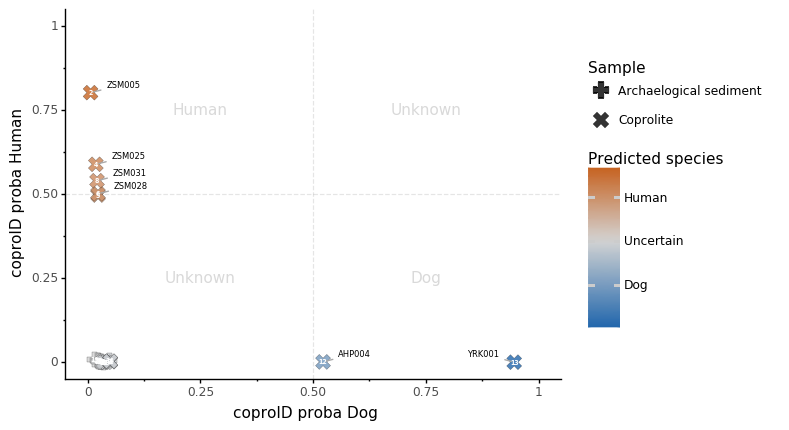

<ggplot: (8790102839609)>

In [116]:
p = ggplot(d, aes(x = 'coproID_proba_Canis_familiaris',y = 'coproID_proba_Homo_sapiens', label='grepel_name'))
# p = p + geom_point(aes(fill="coproID_prediction", shape="sample_type"), color='black', stroke=0.1, size=6, alpha = 0.8)
p = p + geom_point(aes(fill="color_pred", shape="sample_type"), color='black', stroke=0.1, size=6, alpha = 0.8)
p = p + theme_classic() + labs(x='coproID proba Dog',y = 'coproID proba Human')
p = p +  geom_text(size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'darkgrey'
    },
    'on_basemap':True
})
p = p + geom_text(aes(label='plot_id'), size = 4.5, fontweight = 'bold', color='white')
p = p + geom_text(data=species_text, mapping=aes(x='x',y='y', label='text'), alpha=0.3, color='grey')
p = p + geom_hline(yintercept=0.5, linetype='dashed', alpha=0.1) 
p = p + geom_vline(xintercept=0.5, linetype='dashed', alpha=0.1)
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P'})
# p = p + scale_fill_manual(name='Predicted Organism', values = {'Human':'#c44e00', 'Dog':'#2166ac', 'Unknown':'#a2a3a1'})
p = p + scale_fill_gradient2(low='#2166ac', mid='lightgrey',high='#c44e00', labels = ['Dog','Uncertain','Human'])
p = p + coord_cartesian(xlim=[0,1],ylim=[0,1])
p = p + labs(fill='Predicted species')
p.save("results/figure5A.png", dpi=300)
p

In [25]:
species_text2 = species_text

In [26]:
species_text2['text'] = ['Uncertain','Uncertain','Human','Uncertain']

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure5B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


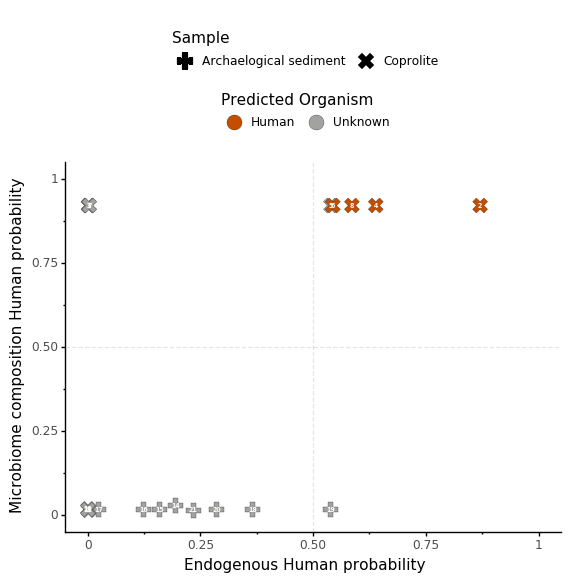

<ggplot: (-9223363246751417582)>

In [27]:
p2 = ggplot(data=d.query('coproID_prediction != "Dog"'))
p2 = p2 + geom_point(aes(x='normalized_bp_proportion_aligned_Homo_sapiens',y='metagenomic_proportion_Homo_sapiens', fill='coproID_prediction', shape="sample_type"), color='black', stroke=0.1, size=6)
p2 = p2 + geom_hline(yintercept=0.5, linetype='dashed', alpha=0.1) 
p2 = p2 + geom_vline(xintercept=0.5, linetype='dashed', alpha=0.1)
p2 = p2 + geom_text(aes(label='plot_id', x='normalized_bp_proportion_aligned_Homo_sapiens',y='metagenomic_proportion_Homo_sapiens'), size = 4.5, fontweight = 'bold', color='white')
p2 = p2 + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P'})
p2 = p2 + scale_fill_manual(name='Predicted Organism', values = {'Human':'#c44e00', 'Dog':'#2166ac', 'Unknown':'#a2a3a1'})
p2 = p2 + theme_classic() + labs(x='Endogenous Human probability',y = 'Microbiome composition Human probability')
p2 = p2 + coord_cartesian(xlim=[0,1],ylim=[0,1])
p2 = p2 + theme(legend_position = 'top')
p2.save("results/figure5B.png", dpi=300)
p2

In [28]:
species_text3 = species_text2
species_text3['text'] = ['Uncertain','Uncertain','Dog','Uncertain']

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure5C.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


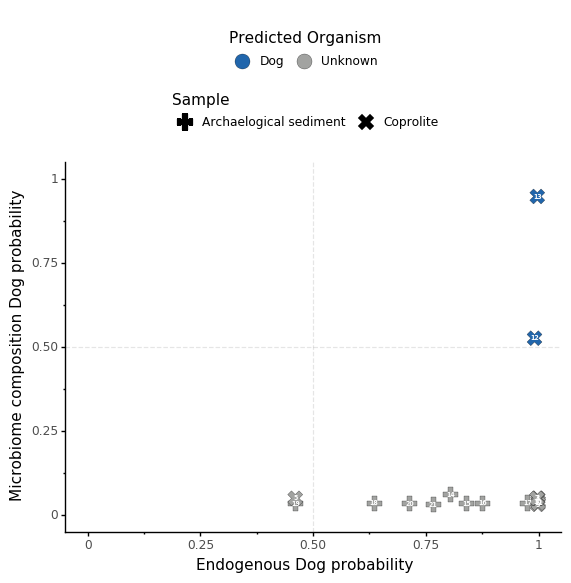

<ggplot: (8790103261802)>

In [29]:
p3 = ggplot(data=d.query('coproID_prediction != "Human"'))
p3 = p3 + geom_point(aes(x='normalized_bp_proportion_aligned_Canis_familiaris',y='metagenomic_proportion_Canis_familiaris', fill='coproID_prediction', shape="sample_type"), color='black', stroke=0.1, size=6)
p3 = p3 + geom_hline(yintercept=0.5, linetype='dashed', alpha=0.1) 
p3 = p3 + geom_vline(xintercept=0.5, linetype='dashed', alpha=0.1)
p3 = p3 + geom_text(mapping=aes(x='normalized_bp_proportion_aligned_Canis_familiaris',y='metagenomic_proportion_Canis_familiaris', label='plot_id'), size = 4.5, fontweight = 'bold', color='white')
p3 = p3 + scale_fill_manual(name='Predicted Organism', values = {'Human':'#c44e00', 'Dog':'#2166ac', 'Unknown':'#a2a3a1'})
p3 = p3 + theme_classic() + labs(x='Endogenous Dog probability',y = 'Microbiome composition Dog probability')
p3 = p3 + coord_cartesian(xlim=[0,1],ylim=[0,1])
p3 = p3 + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P'})
p3 = p3 + theme(legend_position = 'top')
p3.save("results/figure5C.png", dpi=300)
p3